<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Spectral Clustering

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M. J., 2024, Applied Machine Learning in Python: A Hands-on Guide with Code. GitHub repository. Zenodo. DOI: 10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. DOI: 10.5281/zenodo.13835312  [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Spectral Clustering**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Cluster Analysis](https://youtu.be/oFE10cLl0Fs?si=AwmYnrYggtYWGV2n)
* [Issues with k-Means Clustering](https://youtu.be/ysJw8M_J40I?si=EIlg2941QrfAt7zE)
* [Density-based Clustering](https://www.youtube.com/watch?v=3GaLe8HaDMc&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=15)
* Spectral Clustering - I will get this recorded and updated ASAP.

#### Motivation for Spectral Cluster Analysis

We need to learn and segment distinct populations to improve our prediction models. 

* Mixing distinct populations to train prediction models often reduces model accuracy.

* Clustering is an inferential machine learning method to automate the segmentation of the dataset into separate groups, known as clusters and specified by an integer index.

* Common methods for cluster analysis like k-means clustering are easy to apply but are only based on proximity in the feature space and do not integrate information about the pairwise relationships between the data samples; therefore, it is essential to add clustering methods, like spectral clustering, to our toolkit.

* Always remember, the computer does not provide meaning nor description of the groups, that is our job!

Here's a simple workflow demonstrating spectral clustering (for automated category assignment). This should help you get started with inferential methods to find patterns in your subsurface data sets.

#### Clustering Methods Covered

I cover the following clustering methods,

* **k-Means clustering** as a centroid-based clustering method with predetermined number of clusters

* **Density-based with DBSCAN**, density-based spatial clustering of applications with noise, as a density-based clustering method without predetermined number of clusters

* **Spectral clustering** as a hierarchical connectivity-based clustering method with predetermined number of clusters

Let's cover essential prerequisites before we get started with spectral cluster analysis. Let's start with the concept of inferential machine learning and then briefly discuss k-means clustering for comparison to spectral clustering.

#### Inferential Machine Learning

There are no response features, $y$, just predictor features,

$$
𝑋_1,\ldots,𝑋_𝑚
$$

* Machine learns by mimicry a compact representation of the data
* Captures patterns as feature projections, group assignments, neural network latent features, etc.
* We focus on inference of the population, the natural system, instead of prediction of response features.

#### k-Means Clustering

The K-means clustering approach is primarily applied as an unsupervised machine learning method for clustering, group assignment to unlabeled data, where dissimilarity within clustered groups is mini minimized. The loss function that is minimized is:

$$ 
J = \sum^k_{i=1} \sum_{\alpha \in C_i} || X_{\alpha} - \mu_i ||
$$

where $i$ is the cluster index, $\alpha$ is the data sample index, $X$ is the data sample and $\mu_i$ is the $i$ cluster prototype, $k$ is the total number of clusters, and $|| X_m - \mu_m ||$ is the Euclidean distance from a sample to the cluster prototype in $M$ dimensional space calculated as:

$$
|| X_{m,\alpha} - \mu_i || =  \sqrt{ \sum_m^M \left( X_{m,\alpha} - \mu_{m,i} \right)^2 }
$$

Here is a summary of import aspects for k-means clustering:

* **Prototype Method** - represents the training data with number of synthetic cases in the features space. For K-means clustering we assign and iteratively update $K$ prototypes.

* **Iterative Solution** - the initial prototypes are assigned randomly in the feature space, the labels for each training sample are updated to the nearest prototype, then the prototypes are adjusted to the centroid of their assigned training data, repeat until there is no further update to the training data assignments.

* **Unsupervised Learning** - the training data are not labeled and are assigned $K$ labels based on their proximity to the prototypes in the feature space. The idea is that similar things, proximity in feature space, should belong to the same cluster group.  

* **Feature Weighting** - the procedure depends on the Euclidian distance between training samples and prototypes in feature space. Distance is treated as the 'inverse' of similarity. If the features have significantly different magnitudes, the feature(s) with the largest magnitudes and ranges will dominate the loss function and cluster groups will become anisotropic aligned orthogonal to the high range feature(s). While the common approach is to standardize / normalize the variables, by-feature weighting may be applied through unequal variances. Note, in this demonstration we normalize the features to range from 0.0 to 1.0. 

#### Assumptions of k-means Clustering

These are the assumptions that result in significant reduction in flexibility of k-means clustering:

1. The clusters are spherical, convex, and isotropic within the predictor feature space.

 * This is due to the model loss based on minimizes difference within clusters, this is accomplished through this simple spherical geometry in the predictor feature space.

2. There is equal variance for all features

$$
\sigma_{X_1}^2 = \sigma_{X_2}^2= \ldots = \sigma_{X_m}^2
$$

* this assumed with the between sample distance / dissimilarity calculation

3. The clusters have similar sizes and frequency (number of samples in the clusters)

* larger cluster are divided to minimize the overall squared difference within clusters

* clusters with few samples in feature space are overwhelmed! 
                             
#### Spectral Clustering                             

Spectral Clustering, utilize the spectrum (eigenvalues) of a matrix that represents the pairwise relationships between the data samples. 

The relationship between the data samples are represented by a graph, here's some prerequisite graph terminology:

<figure style="text-align: center;">
  <img src="_static/spectral_cluster/graph.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Illustration of a simple graph.
</figcaption>
</figure>

* **vertices** are the data samples.
* **edges** as the pairwise connections between data samples. These connections may be represented as 0 or 1 (off or on) known as adjacency or as a degree of connection (larger number is more connected) known as affinity.

<figure style="text-align: center;">
  <img src="_static/spectral_cluster/affinity.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Illustration of adjacency vs. affinity.
</figcaption>
</figure>

Given the graph we can calculate the adjacency matrix or affinity matrix ($A$) as the $n \times n$ matrix with:

$$
A = 
\begin{bmatrix}
0 & a_{1,2} & \dots & a_{1,n} \\
a_{2,1} & 0 & \dots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n,1} & a_{n,2} & \dots & 0 \\
\end{bmatrix}
$$

Note that the diagonal is 0 as the data samples are not considered to be connected to themselves.

For 4 data example above, we have samples 1, 2 and 3 connected to each other and sample 4 is not connected to any other samples, then the adjacency matrix is:

$$
A_{adjacency} = 
\begin{bmatrix}
0 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

Now we need to account for the degree of connectivity for each sample, the number of connections. This is call the degree matrix ($D$).

* We can calculate the degree from adjacency matrix as an marginalization over the rows or columns (doesn't matter as the $A$ is symmetric).

$$
D_{i,i} = \sum_{j=1}^n A_{i,j}
$$

The off-diagonal values for the $D$ matrix are set to zero. Here is the general structure:

$$
D = 
\begin{bmatrix}
d_1 & 0 & \dots & 0 \\
0 & d_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & d_n \\
\end{bmatrix}
$$

For our 4 data samples the $D$ matrix is:

$$
D = 
\begin{bmatrix}
2 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

Data samples 1, 2, and 3 are connected to 2 other samples (they are all connected to each other), but data sample 4 is not connected to any other samples. 

Now we combine the adjacency (or affinity) matrix with degree matrix to form the Graph Laplacian Matrix ($L$) through this operation:

$$
L = D - A
$$

The resulting matrix has the general form:

$$
L = 
\begin{bmatrix}
d_1 & -a_{1,2} & \dots & -a_{1,n} \\
-a_{2,1} & d_2 & \dots & -a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
-a_{n,1} & -a_{n,2} & \dots & d_n \\
\end{bmatrix}
$$

Now if we return to our 4 data sample example we get the graph Laplacian ($L$) of:

$$
L = 
\begin{bmatrix}
2 & -1 & -1 & 0 \\
-1 & 2 & -1 & 0 \\
-1 & -1 & 2 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

We now have a single matrix that summarizes the graph, i.e., the pairwise connections between our data samples. But we need to summarize this such that we describe the most amount of information in the fewest dimensions. 

* this sounds like a similar problem as the one we solved with principal component analysis, so let's use the same mathematics, eigenvalues and eigenvectors, to give us an order set of vectors that describe the most amount of the system and are independent of each other so they each describe unique aspects of the system.

* we calculate the eigenvalues and eigenvectors of the graph Laplacian.

Let's summarize the spectral clustering method: 

1. determine the number of clusters (like k-means clustering)
2. the graph, pairwise data connections are compiled in the graph Laplacian matrix
3. dimensionality reduction of the graph Laplacian matrix is accomplished with eigenvalues, eigenvectors linear, orthogonal projection, rotation to best describe the variance of the system
4. k-means clustering is applied on the $2, 3, \ldots, k$ eigenvectors. For example,

* for $k=2$ clusters we just assign the $2^{nd}$ eigenvector to the data samples, $1, \ldots, n$ and find the 2 k-means clusters in 1D with k-means clustering. 
* for $k=3$ clusters we assign the $2^{nd}$ and $3^{rd}$ eigenvector to the data samples, $1, \ldots, n$ and find the 3 k-means clusters in 2D with k-means clustering.

What are the advantages of spectral clustering?:
* the ability to encode pairwise relationships, integrate expert knowledge.
* eigenvalues provide useful information on the number of clusters, based on the degree of ‘cutting’ required to make k clusters
* lower dimensional representation for the sample data pairwise relationships
* the eigenvalues and eigenvectors can be interpreted

If you would like to see spectral clustering in action, check out my [spectral clustering interactive Python dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Spectral_Clustering.ipynb), 

<figure style="text-align: center;">
  <img src="_static/density_cluster/interactive_spectral.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> My interactive Python dashboard for spectral clustering.
</figcaption>
</figure>

This there are additional dasboards that include illustration and interpretation of the eigenvalues and eigenvectors from spectral clustering,

<figure style="text-align: center;">
  <img src="_static/density_cluster/interactive_eigen.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> My interactive Python dashboard for spectral clustering with graph Laplacian and eigenvectors.
</figcaption>
</figure>

Let's load a dataset and try out spectral clustering.

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [3]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import copy                                                   # for deep copies
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.colors import ListedColormap                  # custom color maps
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,NullLocator,FuncFormatter) # control of axes ticks
from matplotlib.lines import Line2D                           # custom legend entry
import matplotlib.ticker as mtick                             # control tick label formatting
from sklearn.preprocessing import MinMaxScaler                # min/max normalization
from sklearn.cluster import KMeans                            # k-means clustering
from sklearn.cluster import SpectralClustering                # spectral clustering
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed 

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set Up Custom Colormaps for Plotting

Here we specify custom colormap with discretization for plotting.

In [6]:
continuous_cmap = plt.get_cmap('seismic')
num_levels = 7  
discretized_cmap = continuous_cmap(np.linspace(0, 1, num_levels))
discrete_cmap = ListedColormap(discretized_cmap)

#### Declare Functions

Convenience functions to add commas to numbers and major and minor gridlines to plots.

In [9]:
def comma_format(x, pos):
    return f'{int(x):,}'
    
def add_grid():                                            
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [12]:
#os.chdir("d:/PGE383")                                        # set the working directory with the input data file

#### Loading Data
Let's load the provided multivariate, spatial datasets.  It is a comma delimited file with: 

* you can select datasets 1-4 below.

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("nonlinear_facies_v1.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

We do this to reduce the number of data for ease of visualization (hard to see if too many points on our plots) and in the case of spectral clustering so we can visualize the affinity, degree and graph Laplacian matrices. 

In [15]:
dataset = 1                                                   # select a dataset, 1 - 4
reduce_the_data = True; retain_fraction = 0.02                # reduce the number of samples to improve visualization and run time 
yname = 'Facies'                                              # available group label for checking

if dataset == 1:
    Xname = ['Por','Perm']; Xunit = ['%','mD']; Xlabel = ['Porosity','Permeability'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [30.0,1400.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v1.csv') # load our data table   
elif dataset == 2:
    Xname = ['AI','Por']; Xunit = [r'$kg/m2*10^3$','%']; Xlabel = ['Acoustic Impedance','Porosity'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [1200.0,30.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv') # load our data table
elif dataset == 3:
    Xname = ['AI','Por']; Xunit = [r'$kg/m2*10^3$','%']; Xlabel = ['Acoustic Impedance','Porosity'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [1200.0,30.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v3.csv') # load our data table
elif dataset == 4:
    Xname = ['AI','Por']; Xunit = [r'$kg/m2*10^3$','%']; Xlabel = ['Acoustic Impedance','Porosity'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [7000.0,30.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_Gaussian_mixture_v1.csv') # load our data table

nXname = ['n' + feature for feature in Xname]                 # labels, units and ranges for normalized features
nXunit = ['norm[' + unit + ']' for unit in Xunit]
nXlabel = ['Normalized ' + feature for feature in Xlabel]
nXlabelunit = [nXlabel[0] + ' (' + nXunit[0] + ')',nXlabel[1] + ' (' + nXunit[1] + ')']
nXmin = [0.0,0.0]; nXmax = [1.0,1.0]    

if reduce_the_data == True:
    df = df.sample(frac=retain_fraction, random_state = 73073); df = df.reset_index() # extract a fraction of the data

df = df[Xname + [yname]]                                      # make a new DataFrame with only the features of interest
df.head()

,Por,Perm,Facies
0,24.751762,1199.611948,1
1,5.152299,530.125860,3
2,21.259112,1137.369924,1
3,20.203508,1122.143340,1
4,4.145138,737.744165,3


#### Summary Statistics for Tabular Data

The table includes porosity (fraction) and acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$) that we will work with in the demonstration below.

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [18]:
df.describe().transpose()                                     # summary statistics

,count,mean,std,min,25%,50%,75%,max
Por,34.0,16.880290,7.045527,1.405136,12.192611,19.562295,22.544500,26.296139
Perm,34.0,1007.408007,218.666676,245.633475,935.089796,1084.143851,1172.372323,1199.611948
Facies,34.0,1.529412,0.748141,1.000000,1.000000,1.000000,2.000000,3.000000


Let's also check the proportion of facies.

* we will not use these, but they indicate the proportion of samples in each cluster

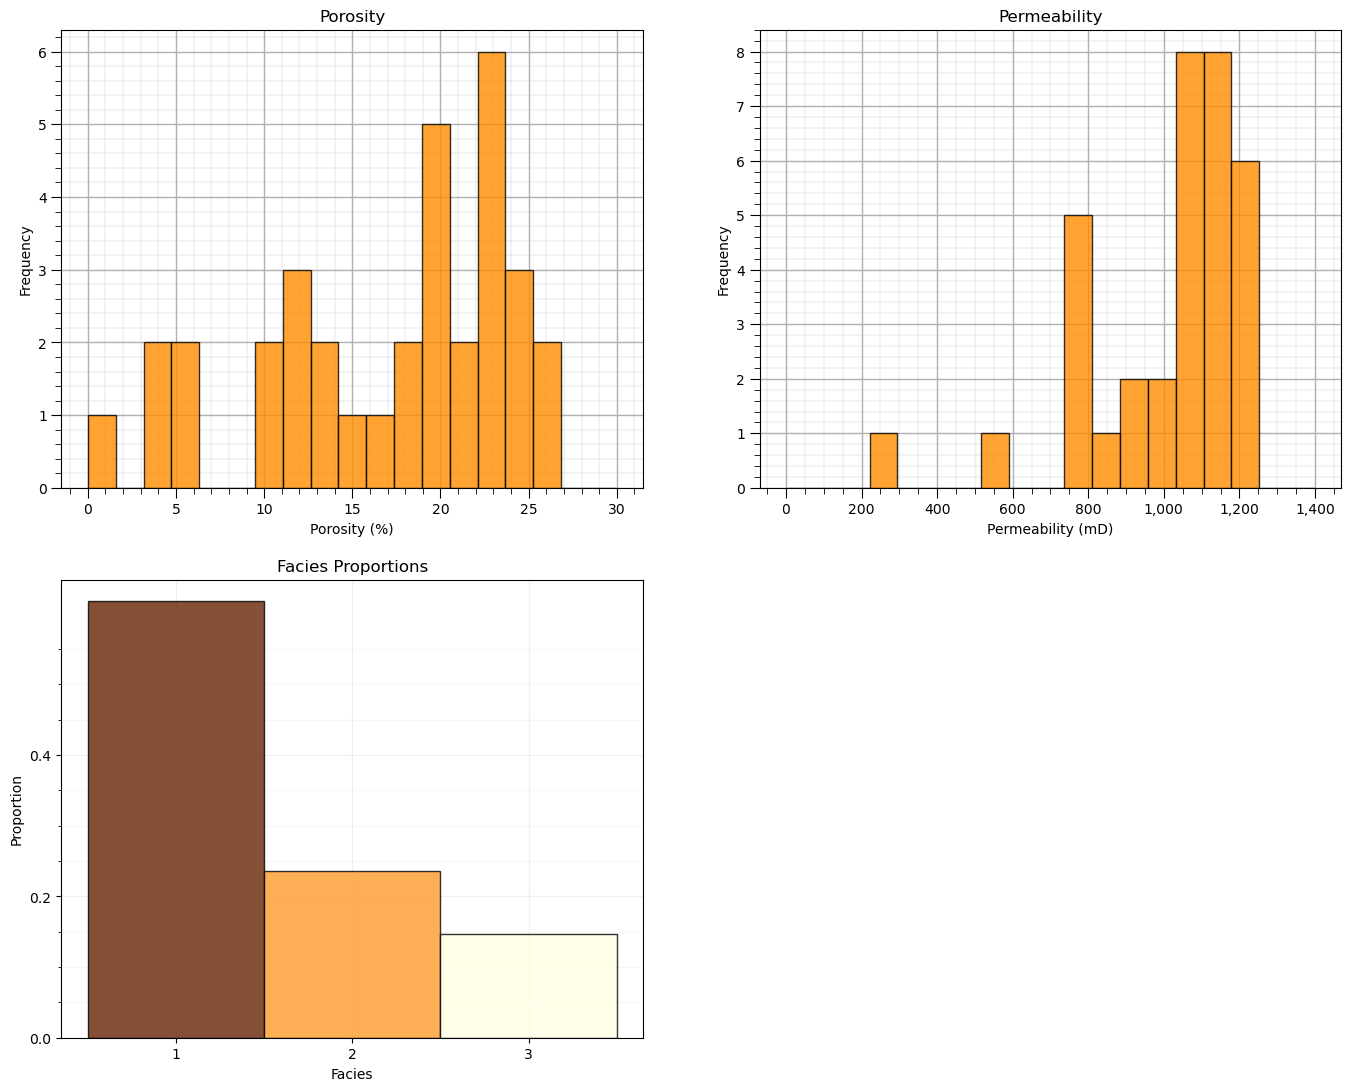

In [31]:
plt.subplot(221)                                              # histogram feature 1
plt.hist(df[Xname[0]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[0],Xmax[0],20),density = False)
plt.title(Xlabel[0])
plt.xlabel(Xlabelunit[0]); plt.ylabel("Frequency")
add_grid()

plt.subplot(222)                                              # histogram feature 2
plt.hist(df[Xname[1]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[1],Xmax[1],20),density = False)
plt.title(Xlabel[1]); plt.xlabel(Xlabelunit[1]); plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid()

plt.subplot(223)                                              # histogram truth label
n, bins, patches = plt.hist(df[yname],alpha=0.8,color="darkorange",edgecolor="black",bins=[0.5,1.5,2.5,3.5],label = ['Shale','SandShale','Sand'],range=[0.5,2.5],density = True)
plt.title('Facies Proportions')
plt.xlabel('Facies'); plt.ylabel("Proportion")
ax = plt.gca()
ax.set_xticks(np.arange(1.0, 3.1, 1)); ax.set_yticks(np.arange(0, 0.6, 0.2)); ax.set_yticks(np.arange(0, 0.6, 0.05), minor=True)
ax.grid(which='minor', alpha=0.1); ax.grid(which='major', alpha=0.2)
colors = plt.cm.YlOrBr_r(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Feature Normalization

The two considered features are quite incompatible. They have dramatically different:

* magnitudes / averages

* variances / ranges

Since the difference in ranges between the features is arbitrary we need to remove this by transforming each of the features. We normalize each of the features to range from 0.0 (minimum) to 1.0 (maximum).  

* Note, with normalization there is no distribution shape change so we would typically check for issues like outliers before the transformation, for brevity this step is not included here given there are no outliers in the provided datasets.

Now we use these normalized feature values for the clustering workflows, e.g., for calculating the required distances distance between samples and prototypes in our workflow:

* note, for each data sample we have original feature and transformed feature values; therefore, it is very easy to go back and forth without the need for backtransformation.

In [33]:
transform = MinMaxScaler();                                   # instantiate the normalization object
df['n' + Xname[0]], df['n' + Xname[1]] = transform.fit_transform(df.loc[:,Xname].values).T # normalize features
df.head(n = 3)

,Por,Perm,Facies,nPor,nPerm
0,24.751762,1199.611948,1,0.937954,1.000000
1,5.152299,530.125860,3,0.150543,0.298217
2,21.259112,1137.369924,1,0.797637,0.934755


Let's confirm that our normalized porosity and acoustic impedance now range between 0 and 1.

In [37]:
df.describe().transpose()                                     # check normalization via summary statistics

,count,mean,std,min,25%,50%,75%,max
Por,34.0,16.880290,7.045527,1.405136,12.192611,19.562295,22.544500,26.296139
Perm,34.0,1007.408007,218.666676,245.633475,935.089796,1084.143851,1172.372323,1199.611948
Facies,34.0,1.529412,0.748141,1.000000,1.000000,1.000000,2.000000,3.000000
nPor,34.0,0.621717,0.283055,0.000000,0.433388,0.729467,0.849277,1.000000
nPerm,34.0,0.798524,0.229216,0.000000,0.722717,0.878962,0.971446,1.000000


and let's compare the original and transformed histograms for the features.

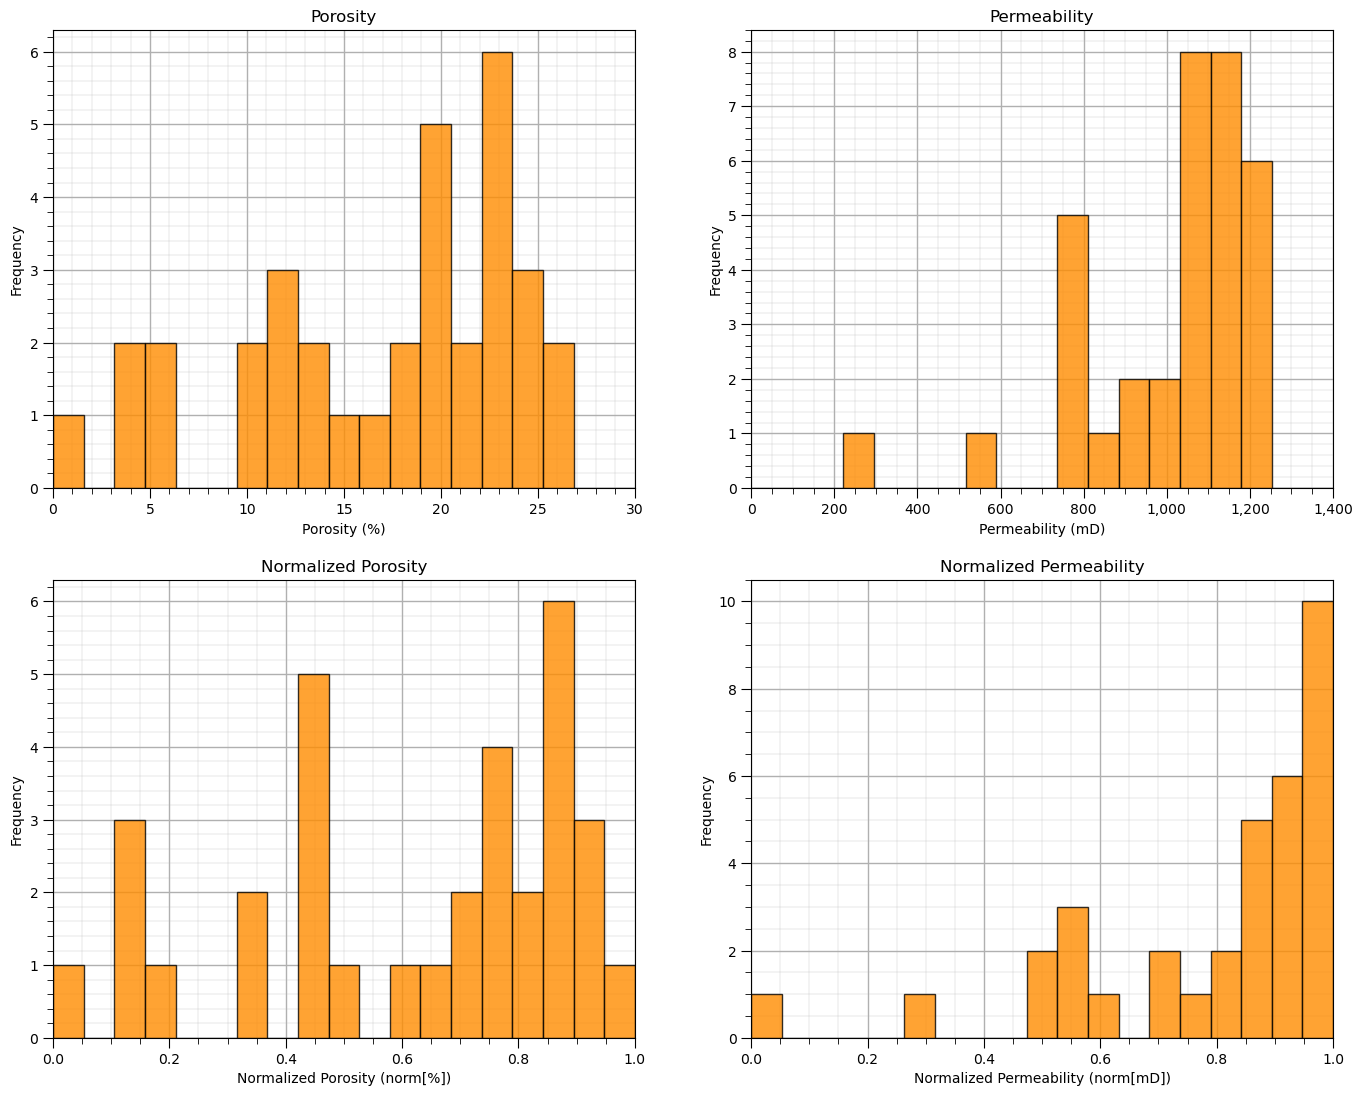

In [44]:
plt.subplot(221)                                              # original histograms
plt.hist(df[Xname[0]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[0],Xmax[0],20),density = False)
plt.title(Xlabel[0]); plt.xlabel(Xlabelunit[0]); plt.ylabel("Frequency"); plt.xlim([Xmin[0],Xmax[0]]); add_grid()

plt.subplot(222)
plt.hist(df[Xname[1]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[1],Xmax[1],20),density = False)
plt.title(Xlabel[1]); plt.xlabel(Xlabelunit[1]); plt.ylabel("Frequency"); plt.xlim([Xmin[1],Xmax[1]])
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid()

plt.subplot(223)                                              # normalized histograms
plt.hist(df[nXname[0]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(nXmin[0],nXmax[0],20),density = False)
plt.title(nXlabel[0]); plt.xlabel(nXlabelunit[0]); plt.ylabel("Frequency"); add_grid(); plt.xlim([nXmin[0],nXmax[0]]);

plt.subplot(224)
plt.hist(df[nXname[1]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(nXmin[1],nXmax[1],20),density = False)
plt.title(nXlabel[1]); plt.xlabel(nXlabelunit[1]); plt.ylabel("Frequency"); add_grid(); plt.xlim([nXmin[1],nXmax[1]]);

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Quick Peek at Available Labels for Educational Purposes

I know this is cheating, but to calibrate our eye's and to check the natural clusters in our dataset, let's cheat and look at the features scatter plotted colored by the facies labels.
* for this demonstration workflow this is our inaccessible truth model, we are using this as only a teaching tool
* after this we will leave these labels out and attempt to automate their assignment with cluster analysis

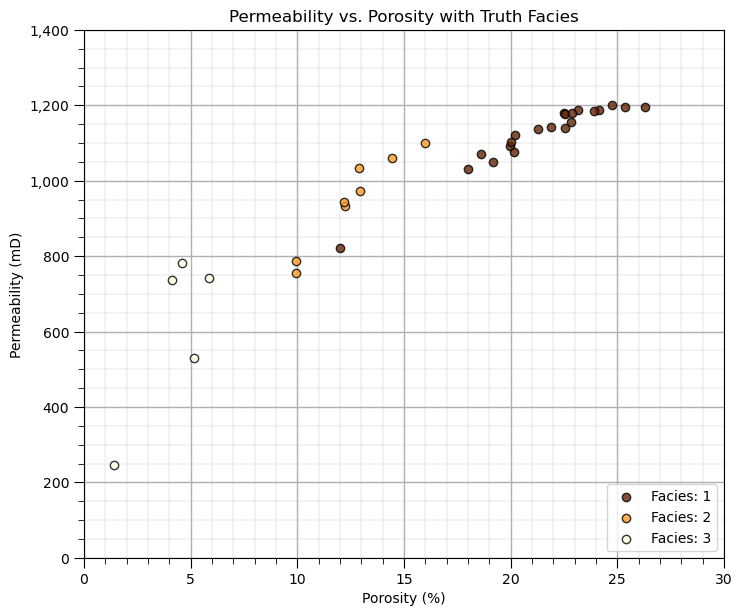

In [48]:
facies_list = np.unique(df[yname])                            # get the facies list from loaded data
min_facies = min(facies_list); max_facies = max(facies_list)
for ifacies in facies_list:                                   # plot the labeled data
    plt.scatter(df[df[yname] == ifacies][Xname[0]],df[df[yname] == ifacies][Xname[1]],
        color = plt.cm.YlOrBr_r((ifacies-min_facies)/(max_facies-min_facies)),edgecolor='black',alpha = 0.8,
        vmin = min_facies, vmax = max_facies,label = 'Facies: ' + str(ifacies))

plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' with Truth ' + yname); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); plt.legend(loc = 'lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Visualization of Training Data

In this exercise, we want to use K-means clustering provide facies based on porosity and brittleness features. 

Let's start by looking at the scatterplot of our training data features, porosity and brittleness.  

* We will look at the data in original units and normalized units through this entire exercise.

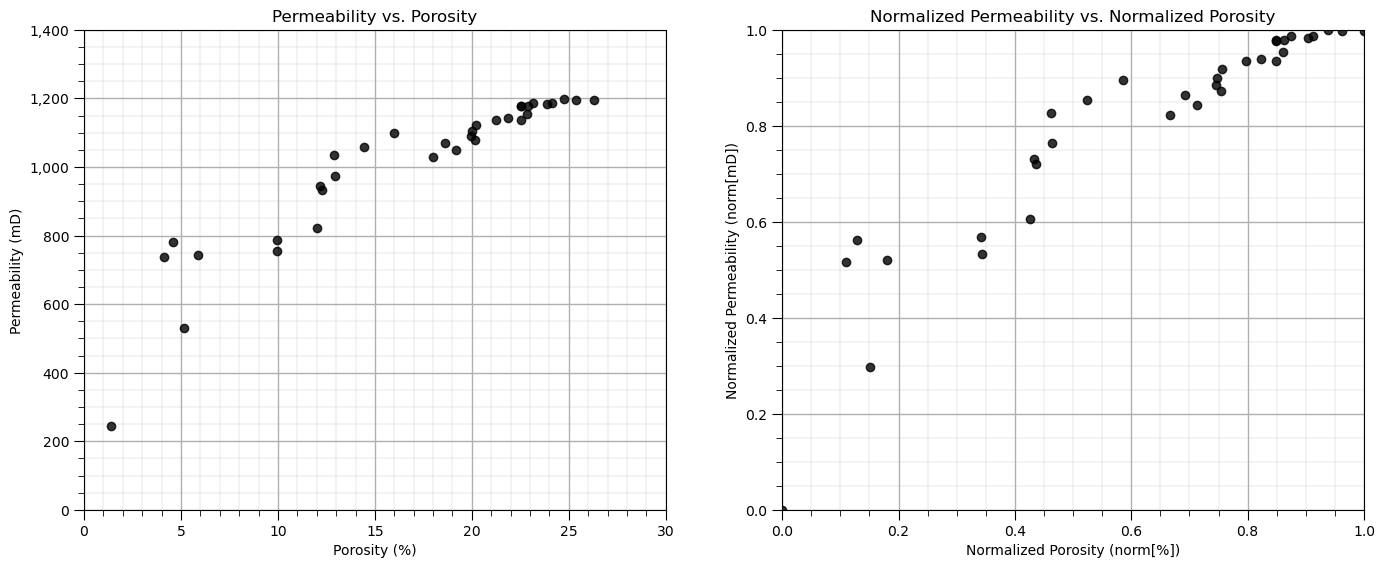

In [51]:
plt.subplot(121)                                              # scatter plot our training data 
plt.scatter(df[Xname[0]],df[Xname[1]], c="black", alpha = 0.8, linewidths=1.0, edgecolors="black")
plt.title(Xlabel[1] + ' vs. ' + Xlabel[0]); plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); 
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); add_grid()

plt.subplot(122)
plt.scatter(df[nXname[0]],df[nXname[1]], c="black", alpha = 0.8, linewidths=1.0, edgecolors="black")
plt.title(nXlabel[1] + ' vs. ' + nXlabel[0]); plt.xlabel(nXlabelunit[0]); plt.ylabel(nXlabelunit[1])
plt.xlim(nXmin[0],nXmax[0]); plt.ylim(nXmin[1],nXmax[1]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Calculate Adjacency, Degree and Graph Laplacian Matrices

Our first step is to calculate the affinity matrix. While kernel and nearest neighbour approaches are common, these methods only integrate proximity information, this step could include integration of various information sources.  
* to demonstrate this here we will assign adjacency by-hand. Let's specify data samples that are connected.
* once again, in practice we would use additional information to build the adjacency or affinity matrix.

For demonstration purposes, let's look at the data samples in feature space with indices plotted to assign some connections.

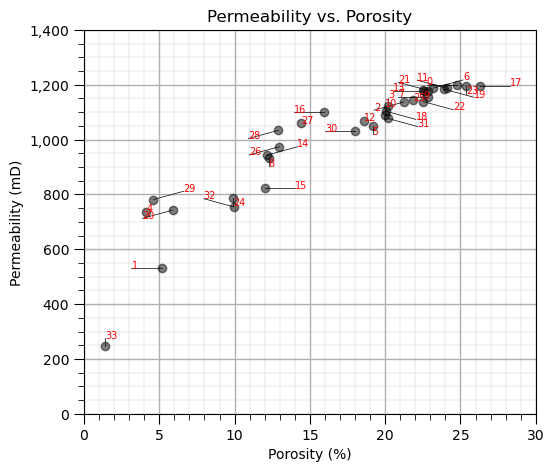

In [55]:
plt.subplot(131)                                              # plot the data unlabeled
np.random.seed(15)                                            # I found a seed with pretty good random "jittered" labels
plt.scatter(df[Xname[0]], df[Xname[1]],c='black',alpha=0.5,edgecolor='k',cmap = cmap)
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0]); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
for i in range(0,len(df)):
    dx = dy = np.random.choice([-1,0,1])*2; dy = np.random.choice([-1,0,1])*30
    x0 = df[Xname[0]][i]; x1 = df[Xname[1]][i]
    xa0 = df[Xname[0]][i]+dx; xa1 = df[Xname[1]][i]+dy
    plt.annotate(i,[xa0,xa1],size=7,zorder=20,color='red')
    plt.plot([x0,xa0],[x1,xa1],color='black',lw=0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Now we specify the connected data pairs by index and build the adjacency, degree and graph Laplacian matrices.

* in practice we only build the adjacency (or affinity) matrix. The others matrices are calculated automatically by the spectral clustering function.

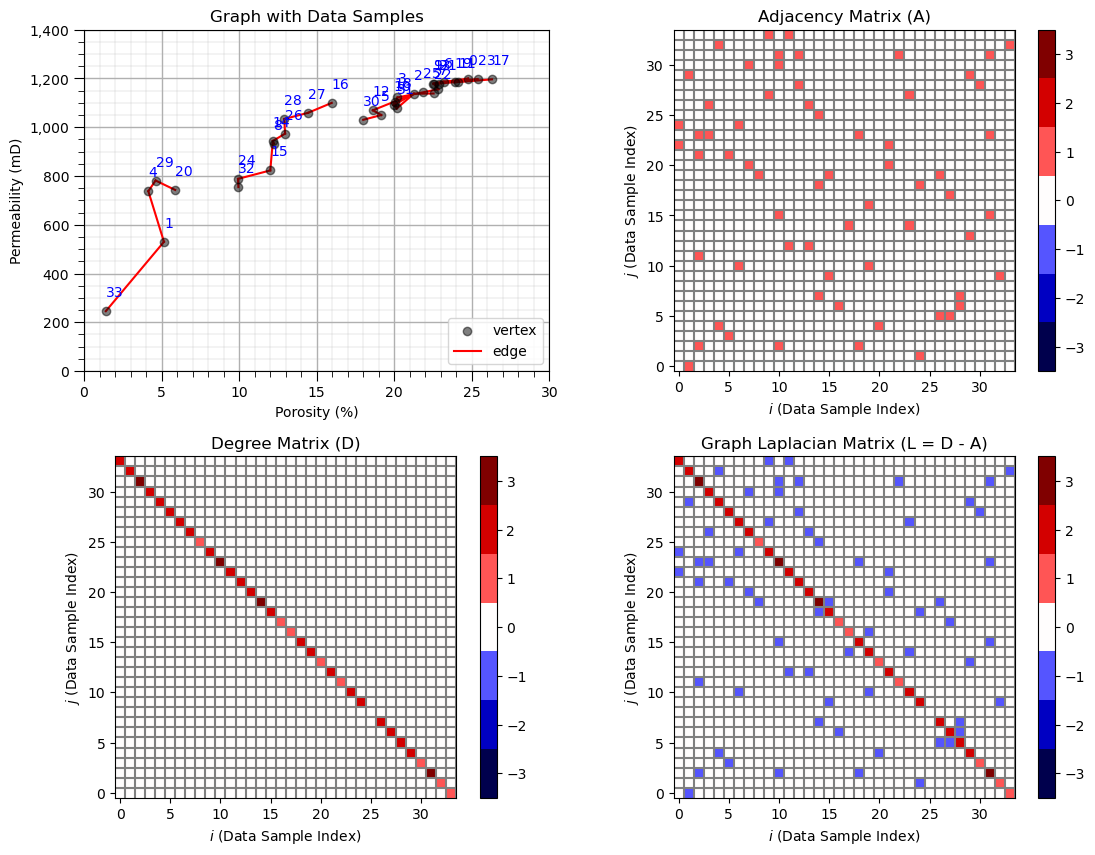

In [58]:
connect = [(33,1),(1,4),(4,29),(29,20),(32,24),(24,15),(14,15),(14,8),(14,26),(26,28),(28,27),(27,16)]
connect = connect + [(30,5),(5,12),(12,2),(2,10),(10,18),(18,31),(31,10),(10,3),(3,7),(7,13),(13,21),(21,11)]
connect = connect + [(11,0),(0,9),(9,6),(6,23),(23,19),(19,17),(22,2),(31,2)]

A = np.zeros((len(df),len(df))); D = np.zeros((len(df),len(df))) # declare the adjacency and degree matrices

for icon in range(0,len(connect)):                            # make adjacency matrix
    A[connect[icon][0],connect[icon][1]] = 1.0
    A[connect[icon][1],connect[icon][0]] = 1.0

degrees = np.sum(A,axis=0)                                    # make degree matrix
for i in range(0,len(df)):
    D[i,i] = degrees[i]

L = D - A                                                     # calculate graph Laplacian matrix

plt.subplot(221)                                              # plot the data with graph vertices
plt.scatter(df[Xname[0]], df[Xname[1]],c='black',alpha=0.5,edgecolor='k',cmap = cmap,zorder=5,label='vertex')
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title('Graph with Data Samples'); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
for i in range(0,len(df)):
    x0 = df[Xname[0]][i]; x1 = df[Xname[1]][i]+60
    plt.annotate(i,[x0,x1],color='blue',zorder=20)

for icon in range(0,len(connect)):
    i,j = connect[icon]
    plt.plot([df[Xname[0]][i],df[Xname[0]][j]],[df[Xname[1]][i],df[Xname[1]][j]],color='red',zorder=1)
line = Line2D([0], [0], label='edge', color='red')

colors = ['#FFFFFF','#000000']  # Black and white
binary_cmap = ListedColormap(colors)
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([line])
plt.legend(handles=handles,loc='lower right')

plt.subplot(222)                                              # plot adjacency matrix
plt.imshow(A,extent=[-0.5,len(df)-1+0.5,-0.5,len(df)-1+0.5],cmap = discrete_cmap,vmin=-3.5,vmax=3.5)
for icon in range(0,len(df)+1):
    plt.plot([icon+0.5,icon+0.5],[-0.5,len(df)-1+0.5],color='grey')
    plt.plot([-0.5,len(df)-1+0.5],[icon+0.5,icon+0.5],color='grey')
plt.xlim([-0.5,len(df)-1+0.5]); plt.ylim([-0.5,len(df)-1+0.5]);
plt.title('Adjacency Matrix (A)'); plt.xlabel('$i$ (Data Sample Index)'); plt.ylabel('$j$ (Data Sample Index)');
cbar = plt.colorbar()

plt.subplot(223)                                              # plot the degree matrix
plt.imshow(D,extent=[-0.5,len(df)-1+0.5,-0.5,len(df)-1+0.5],cmap = discrete_cmap,vmin=-3.5,vmax=3.5)
for icon in range(0,len(df)+1):
    plt.plot([icon+0.5,icon+0.5],[-0.5,len(df)-1+0.5],color='grey')
    plt.plot([-0.5,len(df)-1+0.5],[icon+0.5,icon+0.5],color='grey')
plt.xlim([-0.5,len(df)-1+0.5]); plt.ylim([-0.5,len(df)-1+0.5]);
plt.title('Degree Matrix (D)'); plt.xlabel('$i$ (Data Sample Index)'); plt.ylabel('$j$ (Data Sample Index)');
cbar = plt.colorbar()

plt.subplot(224)                                              # plot the graph Laplacian matrix
plt.imshow(L,extent=[-0.5,len(df)-1+0.5,-0.5,len(df)-1+0.5],cmap = discrete_cmap,vmin=-3.5,vmax=3.5)
for icon in range(0,len(df)+1):
    plt.plot([icon+0.5,icon+0.5],[-0.5,len(df)-1+0.5],color='grey')
    plt.plot([-0.5,len(df)-1+0.5],[icon+0.5,icon+0.5],color='grey')
plt.xlim([-0.5,len(df)-1+0.5]); plt.ylim([-0.5,len(df)-1+0.5]);
plt.title('Graph Laplacian Matrix (L = D - A)'); plt.xlabel('$i$ (Data Sample Index)'); plt.ylabel('$j$ (Data Sample Index)');
cbar = plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.25); plt.show()                 

#### Spectral Clustering with Custom Adjacency Matrix

Now let's run spectral clustering with our adjacency matrix.

* to do this we set the parameter 'affinity' as precomputed and then train on the adjacency matrix instead of the data.

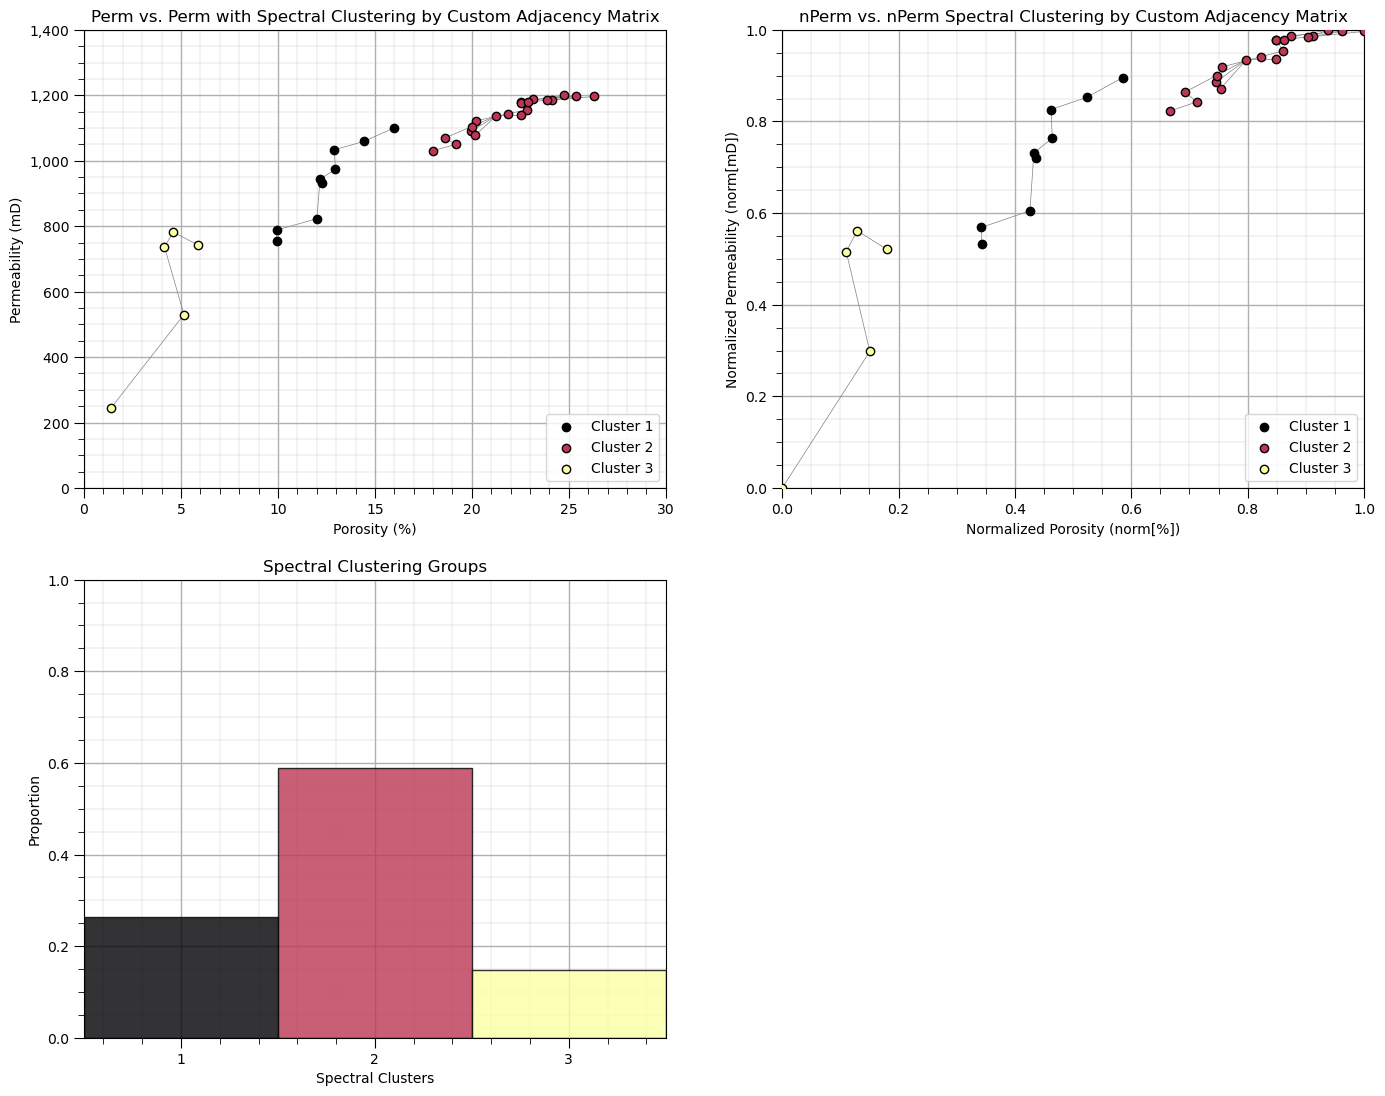

In [63]:
K = 3
spectral = SpectralClustering(n_clusters=K,assign_labels="kmeans",affinity='precomputed', random_state=seed).fit(A)

df['Spectral'] = spectral.labels_ + 1
cluster_list = np.unique(df['Spectral']); min_cluster = min(cluster_list); max_cluster = max(cluster_list)

cmap = plt.cm.inferno

plt.subplot(221)                                              # plot the clusters and graph
for k in range(1,K+1):    
    plt.scatter(df[df['Spectral']==k][Xname[0]], df[df['Spectral']==k][Xname[1]],color=cmap((k-1)/(K-1)),alpha = 1.0,
        linewidths=1.0, edgecolors="black", cmap = cmap,label = 'Cluster ' + str(k),vmin=0,vmax=K,zorder=10)
plt.title(Xname[1] + ' vs. ' + Xname[1] + ' with Spectral Clustering by Custom Adjacency Matrix'); plt.xlabel(Xlabelunit[0])
plt.ylabel(Xlabelunit[1]); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]]); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
for icon in range(0,len(connect)):
    i,j = connect[icon]
    plt.plot([df[Xname[0]][i],df[Xname[0]][j]],[df[Xname[1]][i],df[Xname[1]][j]],color='grey',lw=0.5,zorder=1)
plt.legend(loc='lower right')

plt.subplot(222)                                              # plot the clusters and graph
for k in range(1,K+1):    
    plt.scatter(df[df['Spectral']==k][nXname[0]], df[df['Spectral']==k][nXname[1]],color=cmap((k-1)/(K-1)),alpha = 1.0,
        linewidths=1.0, edgecolors="black", cmap = cmap,label = 'Cluster ' + str(k),vmin=0,vmax=K,zorder=10)
plt.title(nXname[1] + ' vs. ' + nXname[1] + ' Spectral Clustering by Custom Adjacency Matrix'); plt.xlabel(nXlabelunit[0])
plt.ylabel(nXlabelunit[1]); plt.xlim([nXmin[0],nXmax[0]]); plt.ylim([nXmin[1],nXmax[1]]); add_grid()
for icon in range(0,len(connect)):
    i,j = connect[icon]
    plt.plot([df[nXname[0]][i],df[nXname[0]][j]],[df[nXname[1]][i],df[nXname[1]][j]],color='grey',lw=0.5,zorder=1)
plt.legend(loc='lower right')

plt.subplot(223)                                              # plot the cluster groups histograms       
N, bins, patches  = plt.hist(df['Spectral'],alpha=0.8,edgecolor="black",range=[min_cluster-0.5,max_cluster-0.5],
    bins=np.insert(np.linspace(min_cluster,max_cluster,len(cluster_list))+0.5,0,min_cluster-0.5),density = True)
for i in range(0,len(cluster_list)):
    patches[i].set_facecolor(cmap((cluster_list[i]-min_cluster)/(max_cluster-min_cluster)));
ax = plt.gca(); ax.set_xticks(cluster_list); plt.xlabel('Spectral Clusters'); plt.ylabel('Proportion'); plt.title('Spectral Clustering Groups')
plt.xlim([0.5,K+0.5]); plt.ylim([0,1]); add_grid()   

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2)

Some observations:

* unsurprisingly the spectral groups are aligned with the connected groups that we specified.

Let's try something else, we add connections between the 3 group with 2 new vertices.

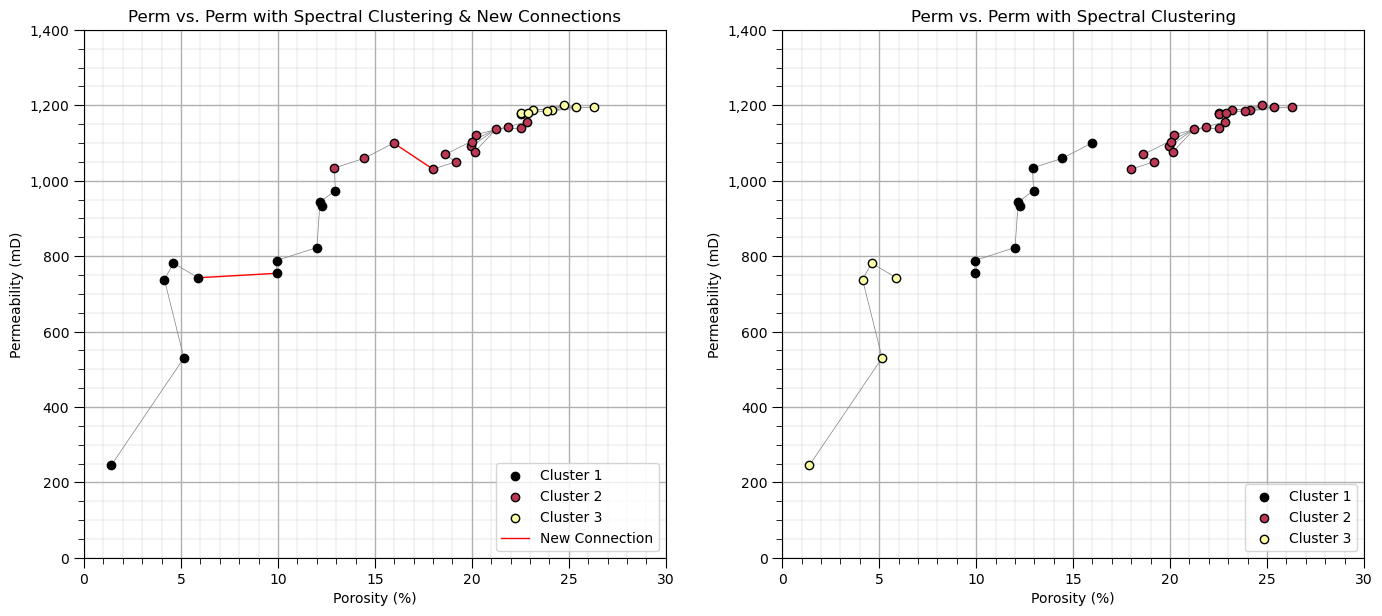

In [70]:
new_vertices = [(20,32),(16,30)]                              # add new vertices
connect2 = connect + new_vertices

A2 = np.zeros((len(df),len(df)))                              # declare the adjacency and degree matrices

for icon in range(0,len(connect2)):
    A2[connect2[icon][0],connect2[icon][1]] = 1.0
    A2[connect2[icon][1],connect2[icon][0]] = 1.0

K = 3                                                         # spectral clustering with the new graph
spectral2 = SpectralClustering(n_clusters=K,assign_labels="kmeans",affinity='precomputed', random_state=seed).fit(A2)

df['Spectral2'] = spectral2.labels_ + 1
cluster_list = np.unique(df['Spectral2']); min_cluster = min(cluster_list); max_cluster = max(cluster_list)

cmap = plt.cm.inferno

plt.subplot(121)                                              # plot the clusters and graph
for k in range(1,K+1):    
    plt.scatter(df[df['Spectral2']==k][Xname[0]], df[df['Spectral2']==k][Xname[1]],color=cmap((k-1)/(K-1)),alpha = 1.0,
        linewidths=1.0, edgecolors="black", cmap = cmap,label = 'Cluster ' + str(k),vmin=0,vmax=K,zorder=10)
plt.title(Xname[1] + ' vs. ' + Xname[1] + ' with Spectral Clustering & New Connections'); plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]]); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
for icon in range(0,len(connect)):
    i,j = connect[icon]
    plt.plot([df[Xname[0]][i],df[Xname[0]][j]],[df[Xname[1]][i],df[Xname[1]][j]],color='grey',lw=0.5,zorder=1)
for icon in range(0,len(new_vertices)):
    i,j = new_vertices[icon]
    if icon == 1:
        plt.plot([df[Xname[0]][i],df[Xname[0]][j]],[df[Xname[1]][i],df[Xname[1]][j]],color='red',lw=1.0,zorder=1,label='New Connection')
    else:
        plt.plot([df[Xname[0]][i],df[Xname[0]][j]],[df[Xname[1]][i],df[Xname[1]][j]],color='red',lw=1.0,zorder=1)
plt.legend(loc='lower right')

plt.subplot(122)                                              # plot the clustering and graph
for k in range(1,K+1):    
    plt.scatter(df[df['Spectral']==k][Xname[0]], df[df['Spectral']==k][Xname[1]],color=cmap((k-1)/(K-1)),alpha = 1.0,
        linewidths=1.0, edgecolors="black", cmap = cmap,label = 'Cluster ' + str(k),vmin=0,vmax=K,zorder=10)
plt.title(Xname[1] + ' vs. ' + Xname[1] + ' with Spectral Clustering'); plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]]); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
for icon in range(0,len(connect)):
    i,j = connect[icon]
    plt.plot([df[Xname[0]][i],df[Xname[0]][j]],[df[Xname[1]][i],df[Xname[1]][j]],color='grey',lw=0.5,zorder=1)
plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

See the added vertices are shown as red bold lines above. Note the shift in the cluster groups across that gap that we connected.

* even though all the data samples are connects, spectral clustering provides rational groups as it learns the difference between direct connections (two data samples connected by a vertex) and indirect connections (two data samples connected via multiple vertices passing through one or more other data samples).

* once again, there is no meaning to the actual cluster group numbers, so don't be concerned with the switch in the cluster group numerical and color assignments.

#### Spectral Clustering with Affinity Matrix from Kernel

There are a variety of methods to calculate an affinity matrix from the data sample locations in the feature space.

* a common method is to use kernel functions, like a radial basis function (RBF) kernel, parameterized by $\gamma$:

$$
K(x_i,x_j) = exp \left(- \gamma || x_i - x_j ||^2 \right)
$$

where $|| x_i - x_j ||$ is the distance between data samples $x_i$ and $x_j$ in the feature space.

* since we are using a distance calculation, we are careful to ensure that normalized or standardize features are used
* **large $\gamma$** - similarity is assigned locally
* **small $\gamma$** - similarity persists over long distances

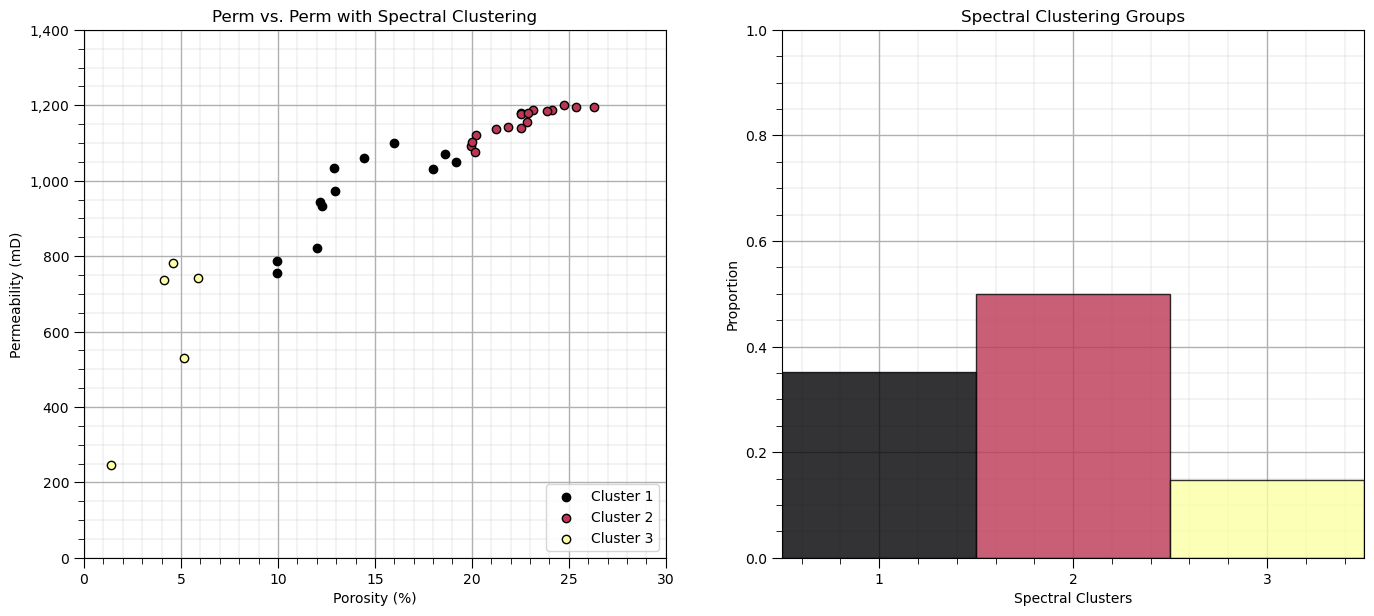

In [72]:
K = 3; gamma = 1.0
spectral = SpectralClustering(n_clusters=K,assign_labels="kmeans",affinity = 'rbf',
                               gamma = gamma,random_state=seed).fit(df[[nXname[0],nXname[1]]].values)
df['Spectral3'] = spectral.labels_ + 1
cluster_list = np.unique(df['Spectral3']); min_cluster = min(cluster_list); max_cluster = max(cluster_list)

cmap = plt.cm.inferno

plt.subplot(121)                                              # plot the clusters and graph
for k in range(1,K+1):    
    plt.scatter(df[df['Spectral3']==k][Xname[0]], df[df['Spectral3']==k][Xname[1]],color=cmap((k-1)/(K-1)),alpha = 1.0,
        linewidths=1.0, edgecolors="black", cmap = cmap,label = 'Cluster ' + str(k),vmin=0,vmax=K,zorder=10)
plt.title(Xname[1] + ' vs. ' + Xname[1] + ' with Spectral Clustering'); plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]]); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); plt.legend(loc='lower right')

plt.subplot(122)                                              # plot the cluster and graph       
N, bins, patches  = plt.hist(df['Spectral3'],alpha=0.8,edgecolor="black",range=[min_cluster-0.5,max_cluster-0.5],
    bins=np.insert(np.linspace(min_cluster,max_cluster,len(cluster_list))+0.5,0,min_cluster-0.5),density = True)
for i in range(0,len(cluster_list)):
    patches[i].set_facecolor(cmap((cluster_list[i]-min_cluster)/(max_cluster-min_cluster)));
ax = plt.gca(); ax.set_xticks(cluster_list); plt.xlabel('Spectral Clusters'); plt.ylabel('Proportion')
plt.title('Spectral Clustering Groups'); plt.xlim([0.5,K+0.5]); plt.ylim([0,1]); add_grid()   

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

Let's look at the affinity matrix that was calculated by scikit-learn's SpectralClustering function to achieve this clustering result.

* this is the pairwise connection between all of the sample data

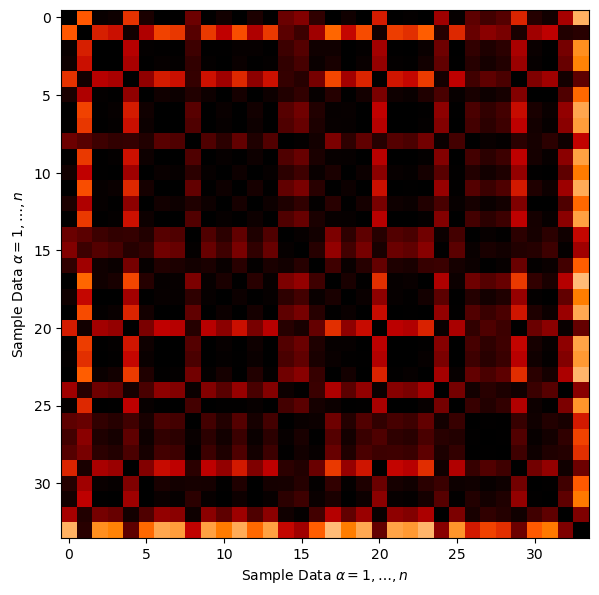

In [74]:
plt.subplot(111)                                              # plot the affinity matrix 
plt.imshow(spectral.affinity_matrix_,cmap = plt.cm.gist_heat_r,vmin = 0.0, vmax = 1.0)
plt.xlabel(r'Sample Data $\alpha = 1, \ldots ,n$'); plt.ylabel(r'Sample Data $\alpha = 1, \ldots ,n$')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

Here's some general observations:

* there is a large number of pairwise connections between the sample data

Let's demonstrate the sensitivity of the solution to the model hyperparameters.

Let's explore the sensitivity in the parameters, by looking at the results over a $3 \times 3$ combinatorial of hyperparameters. Run this the first time as is and then try making changes to these values in this code.

```python
ncluster_mat = [2,3,4] 
gamma_mat = [0.01,1.0,10]
```

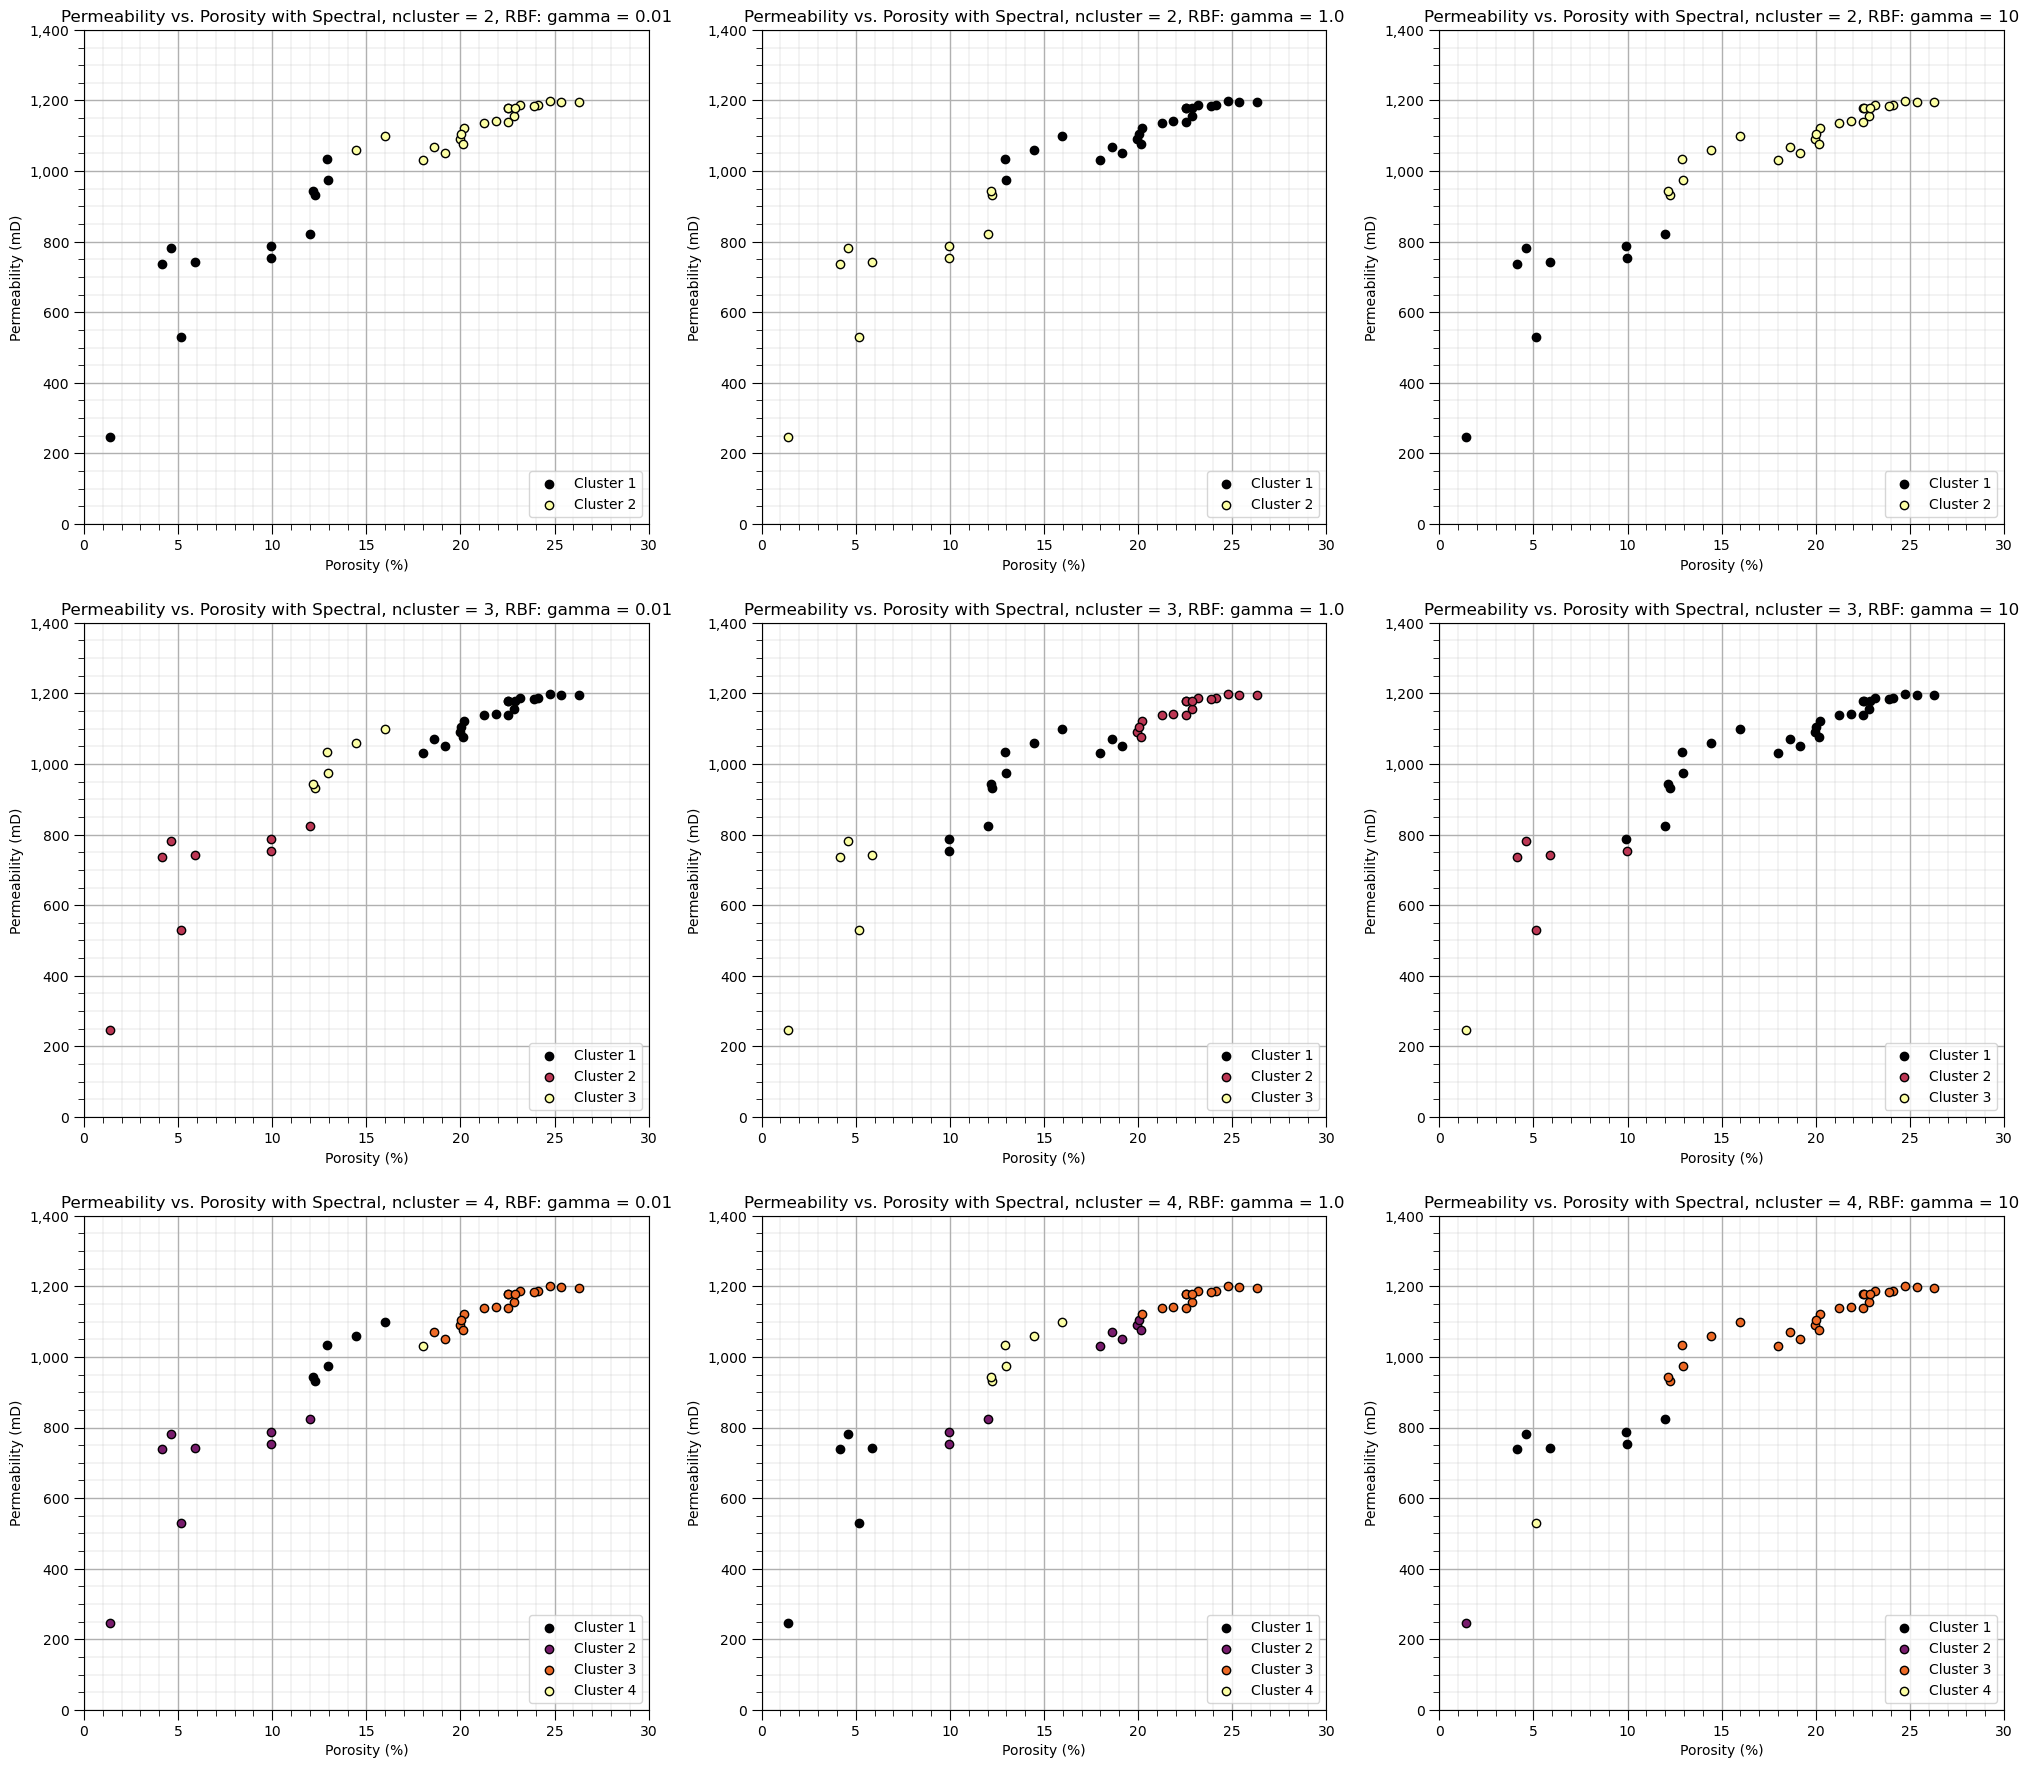

In [78]:
ncluster_mat = [2,3,4]                                        # spectral clustering with RBF kernel affinity cases
gamma_mat = [0.01,1.0,10]
index = 1
for ncluster in ncluster_mat:
    for gamma in gamma_mat:
        spectral = SpectralClustering(n_clusters=ncluster,assign_labels="kmeans",affinity = 'rbf',
                              gamma = gamma,n_neighbors = 200,random_state=230).fit(df[[nXname[0],nXname[1]]].values)
        df['Spectral_test'] = spectral.labels_ + 1
        
        plt.subplot(3,3,index)                                 
        for k in range(1,ncluster+1):    
            if len(df[df['Spectral_test']==k]) > 0:
                plt.scatter(df[df['Spectral_test']==k][Xname[0]], df[df['Spectral_test']==k][Xname[1]],color=cmap((k-1)/(ncluster-1)),alpha = 1.0,
                    linewidths=1.0, edgecolors="black", cmap = cmap,label = 'Cluster ' + str(k),vmin=0,vmax=ncluster,zorder=10)
        plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' with Spectral, ncluster = ' + str(ncluster) + ', RBF: gamma = ' + str(gamma)); 
        plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
        plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]]); add_grid()
        plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
        plt.legend(loc='lower right')
        index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)

An observation from these spectral cluster group assignments:

* as gamma increases, range of similarity is reduced and the model is more sensitive to gaps in the data.

#### Comments

This was a basic treatment of cluster analysis with spectral clustering. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
